# Regressão Linear - Predição da Idade

### importar bibliotecas

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv

In [22]:
train = pd.read_csv('titanic/train.csv')

In [23]:
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [24]:
train.set_index('PassengerId', inplace=True)

In [25]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [26]:
train.shape, test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [27]:
test['Survived'] = np.nan

### Conferir shape novamente

In [28]:
train.shape, test.shape

((891, 11), (418, 11))

### Concatenar train e test set

In [29]:
data = pd.concat([train, test], sort=False)

In [30]:
data.shape

(1309, 11)

### Traduzir colunas

In [31]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 
                'IrmaosConjuge', 'PaisFilhos', 'Bilhete','Tarifa', 'Cabine', 'Embarque']

### Traduzir Sexo

In [33]:
data['Sexo'] = data['Sexo'].map({'male':'homem', 'female': 'mulher'})

In [34]:
data['Sexo'].head()

PassengerId
1     homem
2    mulher
3    mulher
4    mulher
5     homem
Name: Sexo, dtype: object

### Averiguar dados nulos

In [35]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

### Remover Cabine

In [36]:
data.drop('Cabine', axis=1, inplace=True)

### Checar dados nulos novamente

In [37]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [38]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [40]:
data['Embarque'].fillna(moda, inplace=True)

### Checar dados nulos novamente

In [41]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [42]:
media = data['Tarifa'].mean()
media

33.2954792813456

In [43]:
data['Tarifa'].fillna(media, inplace=True)

### Checar dados nulos

In [44]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

### Verificar correlações

In [45]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"

<AxesSubplot:>

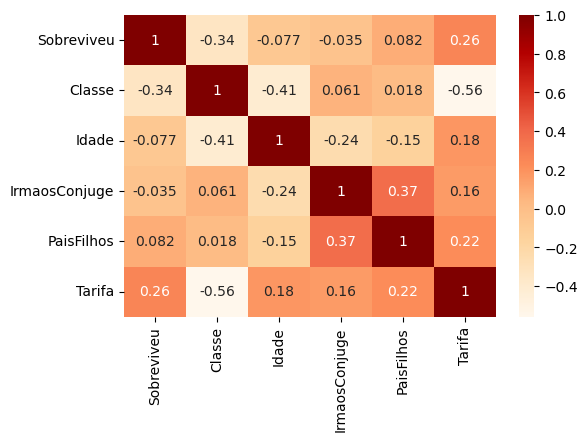

In [46]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [47]:
data.drop('Sobreviveu', axis=1, inplace=True)

### Checar dados nulos

In [48]:
data.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [29]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [30]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [31]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [32]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [33]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [34]:
data.loc[data['Titulo']=='Master'].mean()

Classe            2.655738
Idade             5.482642
IrmaosConjuge     2.049180
PaisFilhos        1.377049
Tarifa           36.008195
dtype: float64

In [35]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada'
}

In [36]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

### Averiguar informações do DataFrame

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Classe           1309 non-null int64
Nome             1309 non-null object
Sexo             1309 non-null object
Idade            1046 non-null float64
IrmaosConjuge    1309 non-null int64
PaisFilhos       1309 non-null int64
Bilhete          1309 non-null object
Tarifa           1309 non-null float64
Embarque         1309 non-null object
Titulo           1275 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### Remover "Bilhete" e "Nome"

In [38]:
data.drop(['Bilhete','Nome'], axis=1, inplace=True)

In [39]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto
2,1,mulher,38.0,1,0,71.2833,C,Casada
3,3,mulher,26.0,0,0,7.9250,S,Solteira
4,1,mulher,35.0,1,0,53.1000,S,Casada
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto


# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

In [40]:
solteiras_com_pais = data.loc[(data['Titulo']=='Solteira') & (data['PaisFilhos']>=1)]
solteiras_com_pais.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.0,1,1,16.7000,S,Solteira
25,3,mulher,8.0,3,1,21.0750,S,Solteira
44,2,mulher,3.0,1,2,41.5792,C,Solteira
59,2,mulher,5.0,1,2,27.7500,S,Solteira
69,3,mulher,17.0,4,2,7.9250,S,Solteira


### idade média de "meninas solteiras acompanhadas dos pais"

In [41]:
solteiras_com_pais['Idade'].mean()

12.178815789473683

### verificar distribuição da idade

/home/danilo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/danilo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


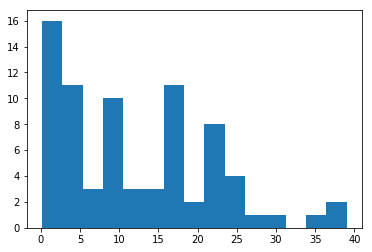

In [42]:
plt.hist(solteiras_com_pais['Idade'], bins=15)
plt.show()

### Média de mulheres "solteiras"

In [43]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()

21.774238095238097

### Distribuição das idades de mulheres "solteiras"

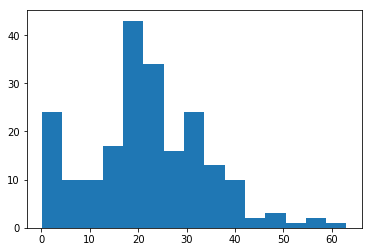

In [44]:
plt.hist(data.loc[data['Titulo']=='Solteira']['Idade'], bins=15)
plt.show()

### Média de idade de mulheres "casadas"

In [45]:
data.loc[data['Titulo']=='Casada']['Idade'].mean()

36.99411764705882

### Distribuição das idades de mulheres "casadas"

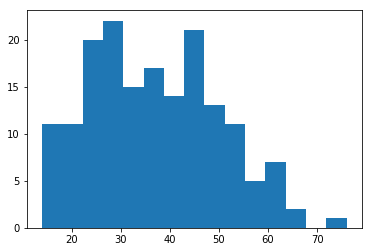

In [46]:
plt.hist(data.loc[data['Titulo']=='Casada']['Idade'], bins=15)
plt.show()

### Adicionar coluna "solteira com pais"

In [47]:
solteiras_com_pais.index

Int64Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,
             173,  181,  185,  206,  230,  234,  238,  298,  312,  319,  330,
             342,  357,  375,  382,  410,  418,  420,  436,  437,  447,  449,
             470,  480,  486,  531,  536,  540,  541,  542,  543,  581,  586,
             594,  616,  619,  635,  643,  645,  652,  690,  692,  703,  721,
             743,  751,  793,  814,  836,  853,  854,  864,  889,  918,  944,
             945, 1009, 1017, 1032, 1067, 1078, 1080, 1095, 1106, 1130, 1142,
            1155, 1175, 1176, 1188, 1218, 1246, 1277, 1294, 1301],
           dtype='int64', name='PassengerId')

In [48]:
data['solteira_com_pais'] = 0

In [49]:
for idx, _ in data.iterrows():
    if idx in solteiras_com_pais.index:
        data['solteira_com_pais'].at[idx] = 1

In [50]:
data.loc[data['solteira_com_pais']==1]['Idade'].mean()

12.178815789473683

In [51]:
data.loc[data['solteira_com_pais']==0]['Idade'].mean()

31.26812371134021

### Transformar recursos categóricos em "dummies"

In [52]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteira_com_pais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,mulher,38.0,1,0,71.2833,C,Casada,0
3,3,mulher,26.0,0,0,7.9250,S,Solteira,0
4,1,mulher,35.0,1,0,53.1000,S,Casada,0
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto,0


In [53]:
data['Sexo'] = data['Sexo'].map({'homem':0, 'mulher':1})

In [54]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteira_com_pais
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,1,38.0,1,0,71.2833,C,Casada,0
3,3,1,26.0,0,0,7.9250,S,Solteira,0
4,1,1,35.0,1,0,53.1000,S,Casada,0
5,3,0,35.0,0,0,8.0500,S,HomemAdulto,0


In [55]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo'], drop_first=True)

In [56]:
data.shape

(1309, 13)

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

In [57]:
data.isnull().sum()

Sexo                    0
Idade                 263
IrmaosConjuge           0
PaisFilhos              0
Tarifa                  0
solteira_com_pais       0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [58]:
train_idade = data.dropna()

In [59]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)

In [60]:
train_idade.shape, test_idade.shape

((1046, 13), (263, 12))

## Definir X e y para treinar o modelo

In [61]:
X = train_idade.drop('Idade', axis=1)

In [62]:
y = train_idade['Idade']

In [63]:
X.shape, y.shape

((1046, 12), (1046,))

### Importar modelo regressivo

In [64]:
from sklearn import linear_model

### Instanciar modelo

In [65]:
lm = linear_model.LinearRegression()

### Importar train_test_split para preparar para treino

In [66]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Treinar modelo

In [68]:
X_train.shape,y_train.shape

((732, 12), (732,))

In [69]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
 X_test.shape, y_test.shape

((314, 12), (314,))

### Fazer predição

In [71]:
pred = lm.predict(X_test)
pred.shape

(314,)

### Importar mean_squared_error (erro quadrado médio)

In [72]:
from sklearn.metrics import mean_squared_error

### Averiguar score

In [73]:
lm.score(X_test, y_test)

0.480587698243224

### Averiguar rmse

In [74]:
mse = mean_squared_error(y_test, pred)

In [75]:
rmse = np.sqrt(mse)
rmse

10.363417349081384

### Visualizar resíduos em scatterplot

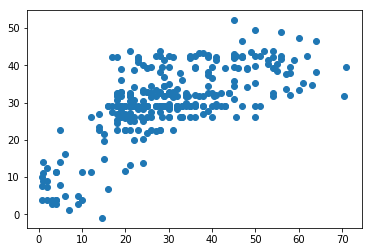

In [76]:
plt.scatter(y_test, pred)
plt.show()

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

In [77]:
test_idade.shape

(263, 12)

In [78]:
pred_idade = lm.predict(test_idade)

In [79]:
pred_idade.shape

(263,)

### Criar coluna Idade contendos as predições

In [80]:
test_idade['Idade'] = pred_idade

In [81]:
test_idade.isnull().sum()

Sexo                  0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteira_com_pais     0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
Idade                 0
dtype: int64

### Averiguar shapes

In [82]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

### Concatenar dados

In [83]:
idade = pd.concat([train_idade, test_idade], sort=False)

### Criar DataFrame contendo "IdPassageiro" e "Idade"

In [84]:
idade.isnull().sum()

Sexo                  0
Idade                 0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteira_com_pais     0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
dtype: int64

In [85]:
idade.shape

(1309, 13)

In [86]:
idade_completa = pd.DataFrame({'IdPassageiro': idade.index, 'Idade': idade['Idade']})

### Salvar CSV com idade completa

In [87]:
idade_completa.to_csv('idade_completa.csv', index=False)

In [88]:
data_idade = pd.read_csv('idade_completa.csv')

In [89]:
data_idade.head()

,IdPassageiro,Idade
0,1,22.0
1,2,38.0
2,3,26.0
3,4,35.0
4,5,35.0
